# MI Excercise 2

## 1. Running a perceptron

### a) Draw plot of data

,x1,x2
0,0.365,0.708
1,0.543,-0.268
2,-0.401,0.643
3,0.866,-0.796
4,-0.386,0.742
...,...,...
195,0.784,0.616
196,0.411,-0.005
197,0.930,0.225
198,1.288,0.184


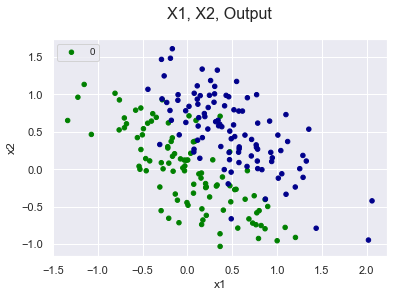

In [106]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

data_df = pd.read_csv('applesOranges.csv', sep=',', header=0, names=["x1", "x2", "output"])

def color_from_value(value):
    return "DarkBlue" if value == 1 else "Green"

output_colors = [color_from_value(output) for output in data_df["output"]]
ax = data_df.plot.scatter(x='x1', y='x2', c=output_colors, legend=True)

ax.set_title("X1, X2, Output" ,pad=20, fontdict={'fontsize': 16})
ax.legend(data_df["output"], loc=2,fontsize= 10)

data_df[["x1", "x2"]]

### b) Trying different weights

,angle,weight,classification_correct_percnt
0,0,"[0.0, 1.0]",69.0
1,10,"[-0.5440211108893699, -0.8390715290764524]",25.5
2,20,"[0.9129452507276277, 0.40808206181339196]",76.5
3,30,"[-0.9880316240928618, 0.15425144988758405]",35.5
4,40,"[0.7451131604793488, -0.6669380616522619]",49.0
5,50,"[-0.26237485370392877, 0.9649660284921133]",61.0
6,60,"[-0.3048106211022167, -0.9524129804151563]",25.0
7,70,"[0.7738906815578891, 0.6333192030862999]",71.0
8,80,"[-0.9938886539233752, -0.11038724383904756]",30.5
9,90,"[0.8939966636005579, -0.4480736161291701]",54.0


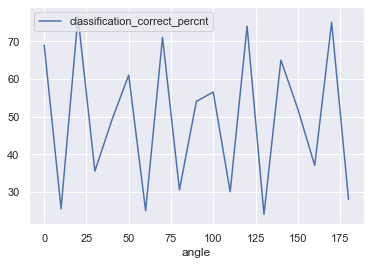

In [107]:
def calculate_weights_from_angle(angle):
    return [np.sin(angle), np.cos(angle)]

class PerceptronNeuron:
    def __init__(self, weight_vector, bias=0):
        self.weight_vector = np.array(weight_vector)
        self.bias = bias

    def evaluate_datapoint(self, datapoint):
        h = (np.dot(self.weight_vector.transpose(), datapoint) - self.bias)
        return 1 if h>= 0 else 0
        
    def evaluate_dataset(self, data_df):
        results = [self.evaluate_datapoint([x1,x2]) for x1, x2 in zip(data_df['x1'], data_df['x2'])]
        data_df["evaluated_output"] = results
        self.results = data_df
        correct_results = [desired == evaluated for desired, evaluated in zip(data_df["output"], results)]
        true_count = np.array(correct_results).sum()
        return (true_count / len(results)) * 100 
    
    def color_from_value(self, value):
        return "DarkBlue" if value == 1 else "Green"
    
    def plot_dataset(self, data_df, draw_weight=False):
        self.evaluate_dataset(data_df)
        output_colors = [self.color_from_value(output) for output in self.results["evaluated_output"]]
        ax = self.results.plot.scatter(x='x1', y='x2', c=output_colors, legend=True)
        ax.set_title("X1, X2, Neuron Evaluated Output" ,pad=20, fontdict={'fontsize': 16})
        ax.legend(data_df["output"], loc=2,fontsize= 10)
        if draw_weight:
            ax.set_title("X1, X2, Neuron Evaluated Output + Weight" ,pad=20, fontdict={'fontsize': 16})
            ax.quiver(0, 0, self.weight_vector[0], self.weight_vector[1], scale=2, color='r')
        

different_angles = range(0, 190, 10)

# 1. Calculate value of function for different weights
different_weights = [calculate_weights_from_angle(angle) for angle in different_angles]
classification_correct_percnt = [PerceptronNeuron(weight).evaluate_dataset(data_df) for weight in different_weights]

# 2. Bundle angles, weights and resulting data into a dataframe
weights_correctnes_df = pd.DataFrame({"angle": different_angles, "weight": different_weights, "classification_correct_percnt": classification_correct_percnt})

# 3. Plot
weights_correctnes_df.plot(x="angle", y=["classification_correct_percnt"])
weights_correctnes_df

### c) Varying the bias

In [108]:
# 1. Get heighest weight by filtering by classification correctness percentage
heighest_weight = weights_correctnes_df[weights_correctnes_df.classification_correct_percnt == weights_correctnes_df.classification_correct_percnt.max()]

# 2. Calculate value of function for different biases (and fixing the weight)
different_biases = range(-3,4,1)
classification_correct_percnt = [PerceptronNeuron(heighest_weight.iloc[0].weight, bias).evaluate_dataset(data_df) for bias in different_biases]

# 3. Bundle biases and their results in a dataframe
biases_correctnes_df = pd.DataFrame({"bias": different_biases, "classification_correct_percnt": classification_correct_percnt})

# 4. Get the heighest_bias
heighest_bias = biases_correctnes_df[biases_correctnes_df.classification_correct_percnt == biases_correctnes_df.classification_correct_percnt.max()]
print("Heighest bias: {}\n".format(heighest_bias.iloc[0].bias))

### d) Plotting values when using heightes scoring weight and bias

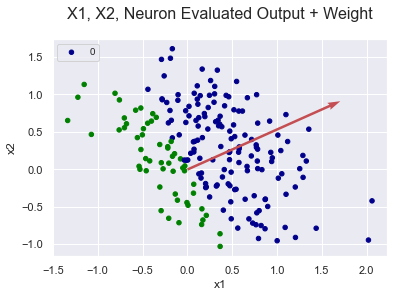

In [115]:
PerceptronNeuron(heighest_weight.iloc[0].weight, heighest_bias.iloc[0].bias).plot_dataset(data_df, draw_weight=True)

**Interpetation**

The direction of the weight is orthogonal to the decision boundary and shows the direction the bias should go to")

### e) Grid search for best weight (angle) - bias combination


<AxesSubplot:xlabel='Bias', ylabel='Angle'>

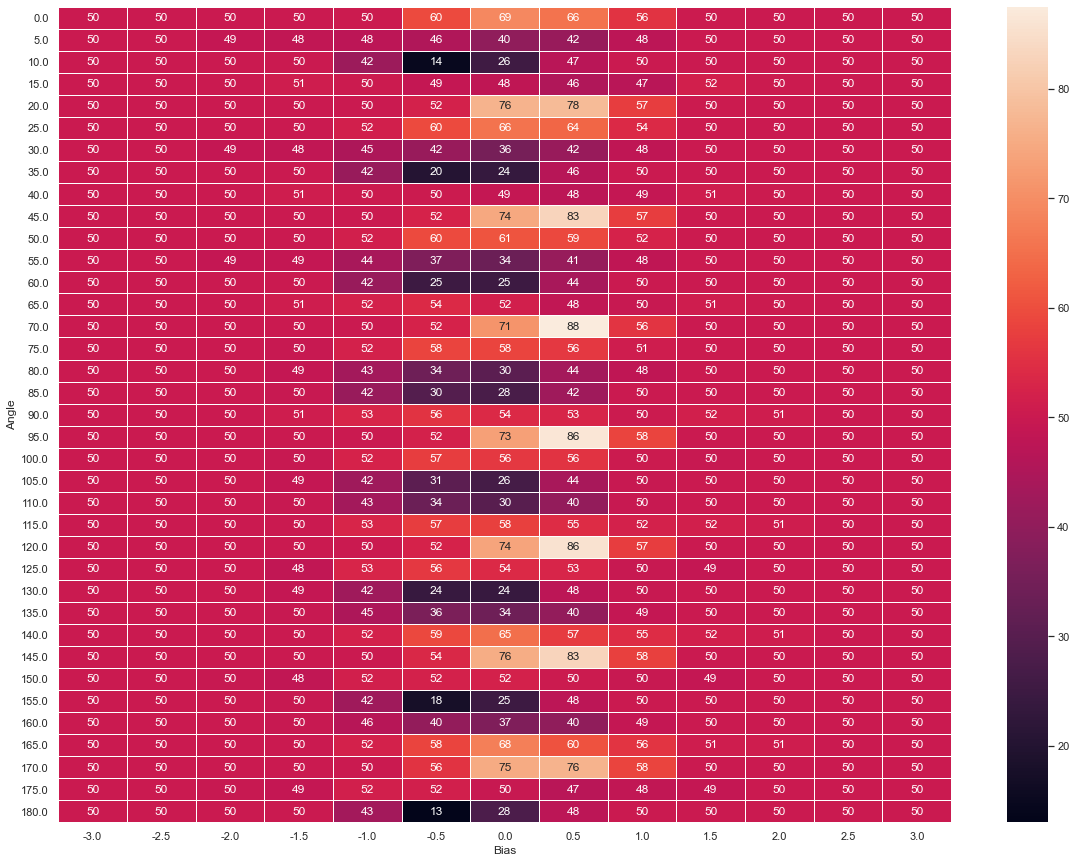

In [114]:
# 1. Define angles and biases range
range_of_angles = np.arange(0, 185, 5)
range_of_biases = np.arange(-3,3.2,0.5)

# 2. Compute permutations by using numpy's meshgrid
angles_biases_combinations = np.array(np.meshgrid(range_of_angles, range_of_biases)).T.reshape(-1, 2)
weights_biases_combinations = [(calculate_weights_from_angle(angle), bias) for angle, bias in angles_biases_combinations]

# 3. Run the perceptron for all angles(weights), biases combinations
grid = [PerceptronNeuron(weight_vector, bias).evaluate_dataset(data_df) for weight_vector, bias in weights_biases_combinations]

# 4. Bundle angles, biases and results in one dataframe
grid_df = pd.DataFrame(angles_biases_combinations, columns =['Angle', 'Bias'])
grid_df["correctness_percentage"] = grid

# 5. Get top 20 combinations
top_20 = grid_df.sort_values(by=['correctness_percentage'], ascending=False).head(20)
top_20

# 6. Plot heatmap
sns.set_theme()
grid_df_plot_ready = grid_df.pivot("Angle", "Bias", "correctness_percentage")
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(grid_df_plot_ready, annot=True, linewidths=.5, ax=ax)

### f) Can grid-search work with other classification problems?